In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

In [3]:
stardf = pd.read_csv("..//clean_stars.csv")
stardf

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
9674,8.45,-0.93,1.13,1.404,K5
9675,7.84,4.26,1.00,1.140,K1IIICN...
9676,9.38,3.61,1.36,0.507,G0
9677,7.64,4.75,0.97,0.075,A2


# Finding Absolute Magnitude 

### I copied this equation off the internet ;D 
Apparently we need it and it's a problem is plx is zero because then we get infinity 

In [60]:
stardf=stardf[stardf.Plx !=0]
stardf

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
9674,8.45,-0.93,1.13,1.404,K5
9675,7.84,4.26,1.00,1.140,K1IIICN...
9676,9.38,3.61,1.36,0.507,G0
9677,7.64,4.75,0.97,0.075,A2


In [61]:
stardf = stardf.reset_index(drop=True)

In [62]:
stardf

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III
...,...,...,...,...,...
9672,8.45,-0.93,1.13,1.404,K5
9673,7.84,4.26,1.00,1.140,K1IIICN...
9674,9.38,3.61,1.36,0.507,G0
9675,7.64,4.75,0.97,0.075,A2


In [63]:
stardf["Amag"] = stardf["Vmag"] + 5* (np.log10(abs(stardf["Plx"]))+1)

In [64]:
stardf

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,9.10,3.54,1.39,0.482,F5,16.845016
1,9.27,21.90,3.10,0.999,K3V,20.972221
2,6.61,2.81,0.63,-0.019,B9,13.853532
3,8.06,7.75,0.97,0.370,F0V,17.506509
4,8.55,2.87,1.11,0.902,G8III,15.839409
...,...,...,...,...,...,...
9672,8.45,-0.93,1.13,1.404,K5,13.292415
9673,7.84,4.26,1.00,1.140,K1IIICN...,15.987048
9674,9.38,3.61,1.36,0.507,G0,17.167536
9675,7.64,4.75,0.97,0.075,A2,16.023468


In [65]:
stardf.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    9677 non-null   float64
 1   Plx     9677 non-null   float64
 2   e_Plx   9677 non-null   float64
 3   B-V     9677 non-null   float64
 4   SpType  9677 non-null   object 
 5   Amag    9677 non-null   float64
dtypes: float64(5), object(1)
memory usage: 453.7+ KB


In [66]:
#issa FLOAT! woooo

In [67]:
scaler=StandardScaler ()

In [68]:
# oh my god you can't SCALE AN OBJECT .. what happens if I just drop that column 
#scaled_my= scaler.fit_transform(stardf[["Vmag", "Plx", "e_Plx", "SpType", "Amag"]])
#idea now is to convert sptype into a class column and then remove and use the same principles we did in unsupervised hw, THEN!!
# WE USE THOSE CLASSES AS A LABEL FOR THE UNSUPERVISED MACHINE LEARNING 
# you can't tell me I'm not a genius 

# absolute experimental insanity section 

Dwarfs (I, II, III, VII)
Giants (IV, V, VI)
Other Special Stars (None)
So we can sort into 3 categories but then use one of those fancy Hertzsprung Russel Diagrams to reverse engineer the labels for other special stars 

In [69]:
stardf['TargetClass'] = stardf['SpType']

In [70]:
stardf.describe ()

,Vmag,Plx,e_Plx,B-V,Amag
count,9677.000000,9677.000000,9677.000000,9677.000000,9677.000000
mean,8.407528,7.545683,1.296913,0.742986,16.730993
std,1.253150,11.040561,1.187446,0.454976,2.460227
min,0.450000,-18.170000,0.470000,-0.359000,2.820000
25%,7.710000,2.730000,0.910000,0.419000,15.389369
50%,8.520000,4.920000,1.110000,0.644000,16.698435
75%,9.170000,8.760000,1.360000,1.083000,18.220190
max,12.810000,280.270000,33.050000,2.835000,29.249165


In [71]:
for i in range(len(stardf['TargetClass'])):
    if "O" in stardf.loc[i,'TargetClass']: 
        stardf.loc[i,'TargetClass'] = 0 # O (Blue, 10 Lacerta)
    elif "B" in stardf.loc[i,'TargetClass']: 
        stardf.loc[i,'TargetClass'] = 1 # (Blue, Rigel)   
    elif "A" in stardf.loc[i,'TargetClass']: 
        stardf.loc[i,'TargetClass'] = 2 # (Blue, Sirius)
    elif "F" in stardf.loc[i,'TargetClass']: 
        stardf.loc[i,'TargetClass'] = 3 # (Blue,White Procyon)
    elif "G" in stardf.loc[i,'TargetClass']: 
        stardf.loc[i,'TargetClass'] = 4 # (White, yellow Sun)
    elif "K" in stardf.loc[i,'TargetClass']: 
        stardf.loc[i,'TargetClass'] = 5 # (Orange,Red Arcturus)
    elif "M" in stardf.loc[i,'TargetClass']: 
        stardf.loc[i,'TargetClass'] = 6 # (Red, Betelguese)
    else: 
        stardf.loc[i,'TargetClass'] = 7 # None- not in main spectral class
        

In [73]:
stardf['TargetClass'].value_counts ()

5    2733
3    2457
4    2178
2    1285
1     559
6     433
7      22
0      10
Name: TargetClass, dtype: int64

In [74]:
stardf

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.10,3.54,1.39,0.482,F5,16.845016,3
1,9.27,21.90,3.10,0.999,K3V,20.972221,5
2,6.61,2.81,0.63,-0.019,B9,13.853532,1
3,8.06,7.75,0.97,0.370,F0V,17.506509,3
4,8.55,2.87,1.11,0.902,G8III,15.839409,4
...,...,...,...,...,...,...,...
9672,8.45,-0.93,1.13,1.404,K5,13.292415,5
9673,7.84,4.26,1.00,1.140,K1IIICN...,15.987048,5
9674,9.38,3.61,1.36,0.507,G0,17.167536,4
9675,7.64,4.75,0.97,0.075,A2,16.023468,2


In [75]:
label=stardf['TargetClass']

In [76]:
stardf= stardf.drop('SpType', axis=1)
stardf

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
...,...,...,...,...,...,...
9672,8.45,-0.93,1.13,1.404,13.292415,5
9673,7.84,4.26,1.00,1.140,15.987048,5
9674,9.38,3.61,1.36,0.507,17.167536,4
9675,7.64,4.75,0.97,0.075,16.023468,2


In [91]:
stardf.to_csv("TG_stars.csv", index=False)

In [77]:
scaled_star= scaler.fit_transform(stardf[["Vmag", "Plx", "e_Plx","B-V", "Amag", "TargetClass"]])
scaled_star[0]

array([ 0.55261351, -0.36283388,  0.07839639, -0.57365481,  0.04634903,
       -0.52260983])

In [78]:
scaled_stardf =  pd.DataFrame(scaled_star,columns= stardf.columns)
scaled_stardf.head()                                      

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,0.552614,-0.362834,0.078396,-0.573655,0.046349,-0.522610
1,0.688279,1.300211,1.518536,0.562727,1.724006,1.010368
2,-1.434482,-0.428957,-0.561666,-1.674868,-1.169652,-2.055588
3,-0.277338,0.018507,-0.275322,-0.819834,0.315237,-0.522610
4,0.113697,-0.423522,-0.157416,0.349518,-0.362418,0.243879


In [79]:
pca = PCA(n_components=0.9)
starpca = pca.fit_transform(scaled_stardf)
pca.explained_variance_ratio_

array([0.31977775, 0.30445958, 0.19912418, 0.11629404])

In [80]:
starpca.shape 

(9677, 4)

In [81]:
tsne = TSNE(learning_rate=300,perplexity=40,n_components=3)
tsne_features = tsne.fit_transform(starpca)

In [82]:
# look if we are going to sort into giant and dwarf then we have predetermined set outcomes so we would need to classify that
#and then teach the program, but if we remove that restriction we can sort the dataset into different stellar classes that
#aren't just dwarf and giant?
# I'm testing this now 

In [83]:
tsne_features.shape

(9677, 3)

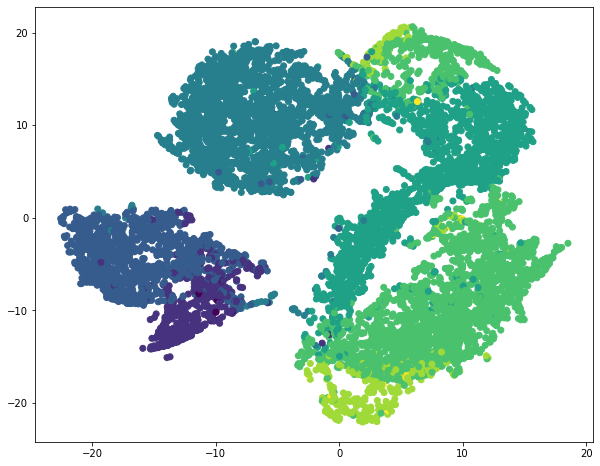

In [84]:
plt.subplots (figsize=(10, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=label)

plt.show()

B-V - B-V color index.
Amag - Absolute Magnitude of the Star.

In [85]:
inertia = []
k = range(1, 11)

In [86]:
for i in k: 
    km = KMeans(n_clusters=i, random_state=21)
    km.fit(stardf)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\clust

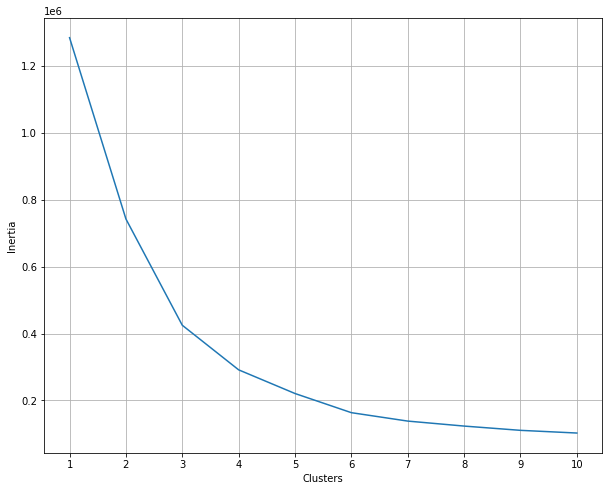

In [87]:
plt.subplots (figsize=(10, 8))
plt.grid ()
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

In [88]:
pca_df = pd.DataFrame(tsne_features, columns=["pc1", "pc2","pc3"])
pca_df.head()

,pc1,pc2,pc3
0,-7.781543,7.604242,-4.423389
1,8.403549,15.155914,5.749207
2,-12.193007,-12.765238,2.159148
3,-10.776055,7.373870,5.156101
4,1.759635,-0.710271,0.242882


In [95]:
km_model = KMeans(n_clusters=7, random_state=21)
km_model.fit(pca_df)

predicted_clusters = km_model.predict(pca_df)
pca_df['group'] = km_model.labels_

pca_df

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,pc1,pc2,pc3,group
0,-7.781543,7.604242,-4.423389,1
1,8.403549,15.155914,5.749207,3
2,-12.193007,-12.765238,2.159148,2
3,-10.776055,7.373870,5.156101,6
4,1.759635,-0.710271,0.242882,4
...,...,...,...,...
9672,3.049992,-12.801699,-2.892659,5
9673,12.096272,-9.963360,2.230955,0
9674,8.553799,5.406176,-4.575355,4
9675,-20.187025,-5.925586,-1.232244,2


In [94]:
import plotly.express as px
fig = px.scatter_3d(
    pca_df,
    x="pc3",
    y="pc2",
    z="pc1",
    color="group",
    symbol="group",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [ ]:
# I mean the experiment worked, it's fixed the data into 3 very separate clusters, there isn't much overlap between the models 